# Предсказание осадков (10)

На основе информации про текущий день нужно определить, будут ли осадки завтра.

**Данные:** https://disk.yandex.ru/d/RGFX7bXCWP3LTg

**Предсказываемая колонка** — RainTomorrow.

В обучающих данных (train) есть целевая переменная RainTomorrow, в тестовых данных (test) она отсутствует.

Результатом должен быть .csv файл с одной колонкой, i-я строка в котором содержит ответ на i-ю строку файла test_data.csv

Рекомендуется сохранять этот файл с помощью pandas с опциями header=None и index=False.

Результат оценивается по метрике `F1-score`. Ваш итоговый балл равен $min(10,15⋅s)$, где $s$ — f1-мера.

In [1]:
import pandas as pd

test = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Ya_professional_2022/main/%D0%98%D0%98.%20%D0%94%D0%B5%D0%BC%D0%BE%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F%20%D0%B4%D0%BB%D1%8F%20%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%BC%D0%B0%D0%B3%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D1%83%D1%80%D1%8B%2C%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%82%D0%B5%D1%82%D0%B0%202022/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BE%D1%81%D0%B0%D0%B4%D0%BA%D0%BE%D0%B2/test_data.csv')
train = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Ya_professional_2022/main/%D0%98%D0%98.%20%D0%94%D0%B5%D0%BC%D0%BE%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F%20%D0%B4%D0%BB%D1%8F%20%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%BC%D0%B0%D0%B3%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D1%83%D1%80%D1%8B%2C%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D0%B0%D0%BB%D0%B8%D1%82%D0%B5%D1%82%D0%B0%202022/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BE%D1%81%D0%B0%D0%B4%D0%BA%D0%BE%D0%B2/train_data.csv')

In [2]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (135414, 22)
Test shape: (10046, 21)


## EDA

Разведочный анализ данных (Exploratory Data Analysis, EDA) – предварительное исследование Датасета (Dataset) с целью определения его основных характеристик, взаимосвязей между признаками, а также сужения набора методов, используемых для создания Модели (Model) Машинного обучения (Machine Learning).

**В EDA обычно включают:**
- проверку размерности данных
- исследование типов переменных
- исследование данных на пропуски
- исследование на аномальные значения (выбросы)
- исследование данных на категорильные значения
- исследование на дубликаты
- исследование взаимосвязи между переменными

и так далее.

**Исследовательский анализ данных в основном выполняется с использованием следующих методов:**

- Одномерная визуализация — предоставляет сводную статистику для каждого поля в наборе необработанных данных.
- Двумерная визуализация — выполняется, чтобы найти взаимосвязь между каждой переменной в наборе данных и интересующей целевой переменной.
- Многомерная визуализация — выполняется для понимания взаимодействий между различными полями в наборе данных.
- Уменьшение размерности — помогает понять поля данных, на которые приходится наибольшее расхождение между наблюдениями, и позволяет обрабатывать уменьшенный объем данных.

С помощью этих методов специалист по данным проверяет предположения и выявляет шаблоны, которые позволят понять проблему и выбрать модель, а также подтверждает, что данные были сгенерированы так, как ожидалось. Итак, проверяется распределение значений каждого поля, определяется количество пропущенных значений и находятся возможные способы их замены.

In [ ]:
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Dartmoor,7.4,14.4,1.8,2.4,8.3,SSW,37.0,NaN,SW,...,100.0,58.0,1026.0,1026.1,NaN,NaN,9.1,13.5,1,0


### Пропуски в данных

In [ ]:
# Подсчёт пропусков в данных
train.isna().sum()

Location             0
MinTemp           1353
MaxTemp           1154
Rainfall          3013
Evaporation      56152
Sunshine         62386
WindGustDir       9692
WindGustSpeed     9629
WindDir9am        9908
WindDir3pm        3749
WindSpeed9am      1695
WindSpeed3pm      2628
Humidity9am       2468
Humidity3pm       3783
Pressure9am      14017
Pressure3pm      13983
Cloud9am         51193
Cloud3pm         53867
Temp9am           1691
Temp3pm           2975
RainToday            0
RainTomorrow         0
dtype: int64

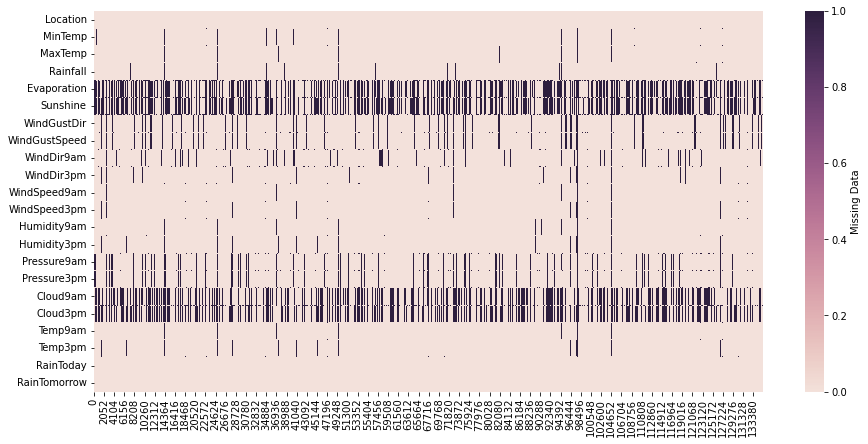

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения пропущенных значений
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

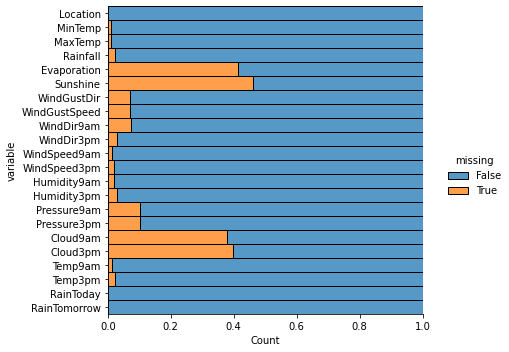

In [ ]:
#  График распределения пропусков

plt.figure(figsize=(10,6))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

### Распределение признаков

In [ ]:
train.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,...,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000,54554.000000
mean,12.634986,13.398911,24.158436,2.117289,5.489843,7.730034,40.965722,15.754427,19.876599,65.829912,...,0.049291,0.048576,0.072424,0.073432,0.058969,0.060326,0.070242,0.070297,0.057191,0.068409
std,7.322892,6.426364,6.985087,6.952135,3.701936,3.756866,13.338013,8.342306,8.521647,18.552647,...,0.216476,0.214981,0.259190,0.260846,0.235569,0.238091,0.255557,0.255650,0.232209,0.252449
min,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,8.500000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,13.100000,23.800000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,18.400000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


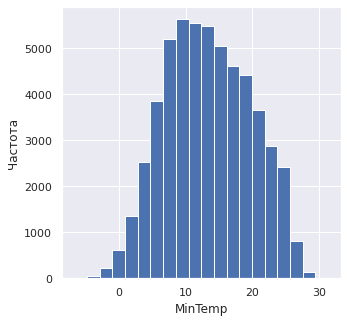

In [ ]:
train.MinTemp.hist(bins=20)
plt.xlabel('MinTemp')
plt.ylabel('Частота')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


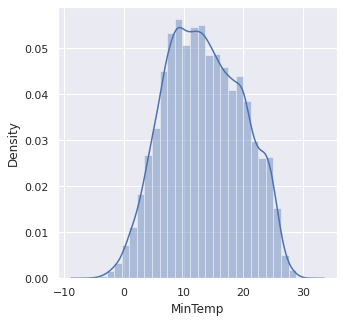

In [ ]:
sns.distplot(train['MinTemp'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


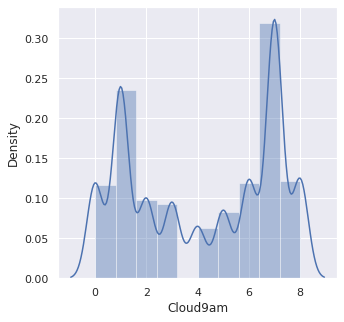

In [ ]:
sns.distplot(train['Cloud9am'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


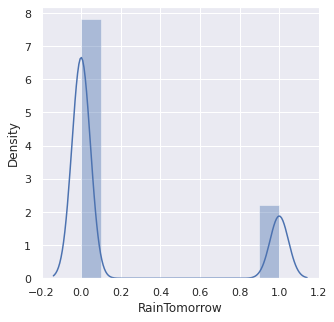

In [ ]:
sns.distplot(train['RainTomorrow'], bins=10)

### Корреляция признаков

Корреляция (от лат. correlatio), корреляционная зависимость — взаимозависимость  двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых), т.е. поведение переменных одинаково.

- $r > 0$ указывает на положительную корреляцию.
- $r < 0$ указывает на отрицательную корреляцию.
- $r = 1$ является максимально возможным значением r. Это свидетельство полной линейной зависимости между переменными.
- $r = −1$ является минимально возможным значением r. Это свидетельство полного отсутствия линейной зависимости между переменными.
- $r ≈ 0$ или когда around около нуля, означает, что корреляция между переменными отсутствует.

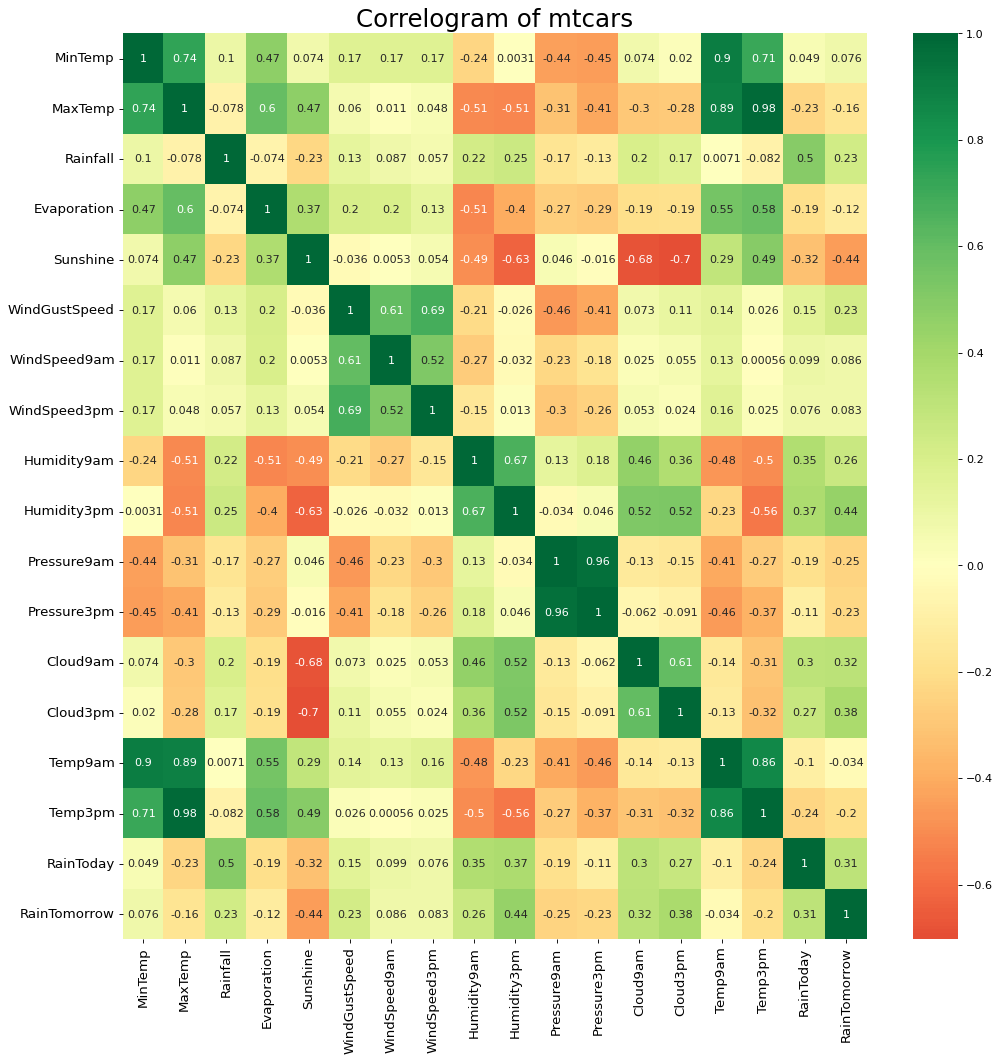

In [ ]:
# Матрица корреляции признаков
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import numpy as np

# вычисляем матрицу корреляции в абсолютных значениях
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']

### Взаимосвязи между переменными

График попарных отношений , который по умолчанию создает матрицу точечных графиков. Такой график помогает нам визуализировать взаимосвязь между различными переменными в одном выводе.

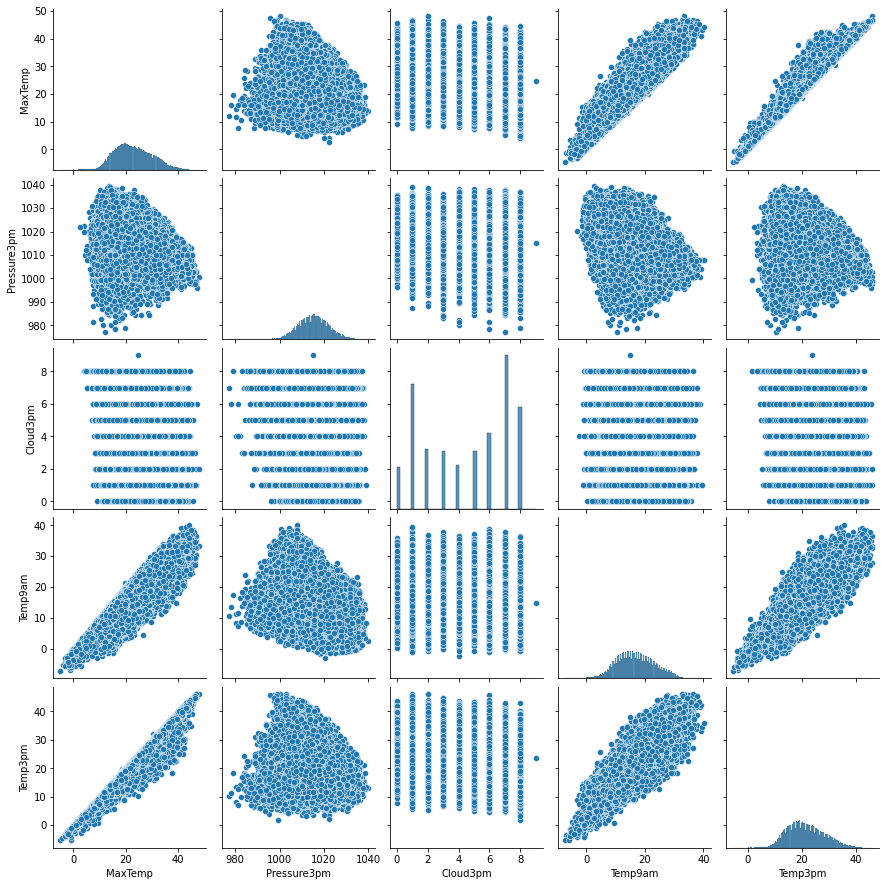

In [ ]:
tmp = train[['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
sns.pairplot(tmp)

### BoxPlot

**Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot)** – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

Виды наблюдений, которые можно сделать на основе ящика с усами:
- Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.
- Существуют ли выбросы и каковы их значения.
- Симметричны ли данные.
- Насколько плотно сгруппированы данные.
- Смещены ли данные и, если да, то в каком направлении.

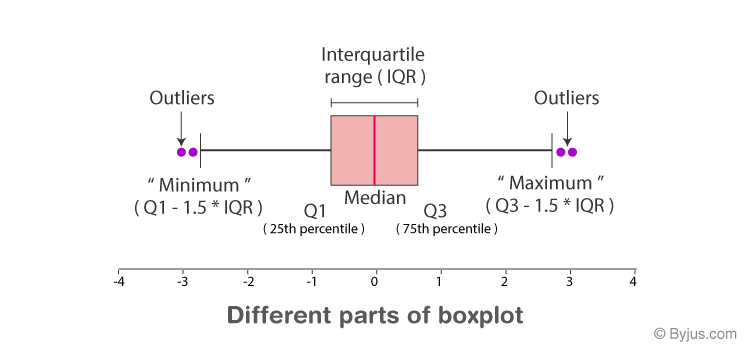

_**Медиана** – значение, которое делит отсортированные по возрастанию данных на две равные части. То есть медиана показывает середину ваших данных. Медиана считается как значение, расположенное по середине ряда отсортированных значений._

In [ ]:
import statistics

print(f"Mean value of MinTemp: {train['MinTemp'].mean()}")
print(f"Median value of MinTemp: {train['MinTemp'].median()}")

Mean value of MinTemp: 13.398911170583274
Median value of MinTemp: 13.1


- медиана (Q2/50-й процентиль): среднее значение набора данных.
- первый квартиль (Q1/25-й процентиль): среднее число между наименьшим числом (не «минимум») и медианой набора данных.
- третий квартиль (Q3/75-й процентиль): среднее значение между - медианой и максимальным значением (не «максимальным») набора данных.
- Межквартильный диапазон (IQR) : от 25-го до 75-го процентиля. IQR показывает, насколько разбросаны средние значения.
- «максимум»: Q3 + 1,5*IQR
- «минимум»: Q1 -1,5*IQR
- Выбросы : (обозначены зелеными кружками) В статистике выбросом является точка наблюдения, удаленная от других наблюдений.

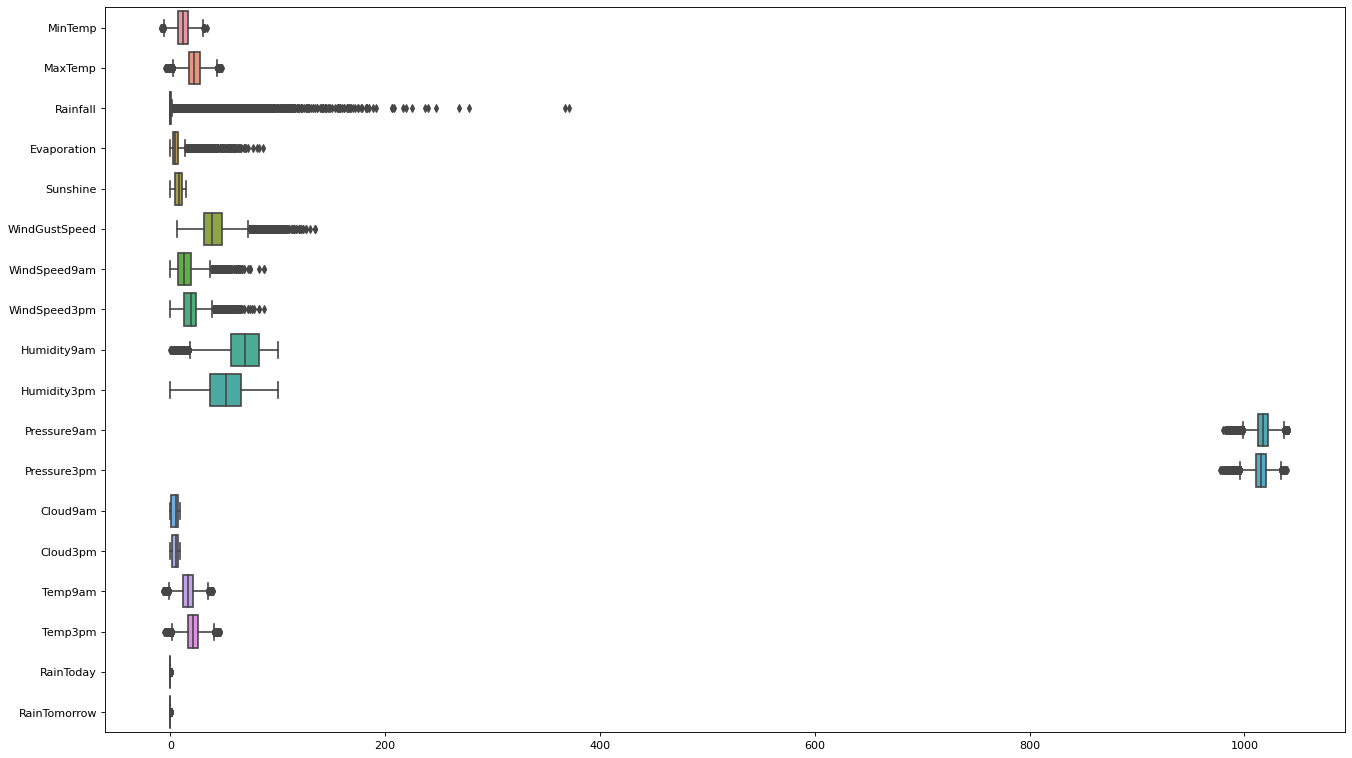

In [ ]:
plt.figure(figsize=(20,12), dpi= 80)
sns.boxplot(data=train, orient='h')
plt.show()

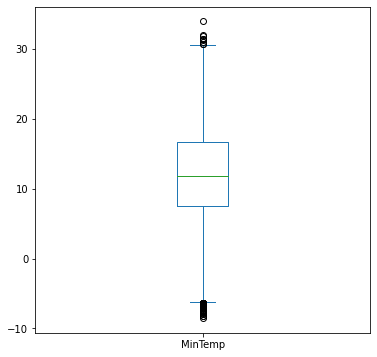

In [ ]:
_, bp = train.MinTemp.plot.box(return_type='both', figsize=(6,6))

In [ ]:
Q1 =  train.MinTemp.quantile(0.25)
Q3 = train.MinTemp.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(IQR)
print(Q3)

train[(train.MinTemp < Q1-1.5*IQR ) | (train.MinTemp > Q3+1.5*IQR)]

7.5
9.2
16.7


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9870,MountGinini,-8.5,0.6,1.0,NaN,NaN,S,31.0,WNW,SW,...,47.0,72.0,NaN,NaN,NaN,NaN,-0.9,-0.4,0,0
11432,Canberra,-7.0,11.7,0.0,NaN,NaN,SSE,35.0,NE,W,...,82.0,44.0,1026.2,1023.8,NaN,NaN,0.7,11.1,0,0
12713,MountGinini,-6.7,0.7,2.2,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,58.0,NaN,NaN,NaN,NaN,-1.5,0.0,1,0
14185,Canberra,-8.0,15.1,0.2,2.6,7.9,NaN,NaN,NNW,NW,...,96.0,33.0,1029.6,1025.3,1.0,NaN,-1.2,14.5,0,0
15010,MountGinini,-7.0,3.4,0.0,NaN,NaN,E,26.0,ESE,E,...,79.0,60.0,NaN,NaN,NaN,NaN,-1.3,2.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120524,Canberra,-7.0,10.5,0.0,NaN,NaN,NNW,28.0,NaN,NW,...,84.0,37.0,1028.8,1025.5,NaN,NaN,0.5,9.6,0,0
127661,MountGinini,-6.5,3.5,1.6,NaN,NaN,WSW,39.0,SSW,WNW,...,87.0,69.0,NaN,NaN,NaN,NaN,-3.7,2.9,1,0
128226,MountGinini,-6.4,2.2,0.0,NaN,NaN,E,31.0,E,E,...,98.0,87.0,NaN,NaN,NaN,NaN,-3.5,1.3,0,0
129970,MountGinini,-6.5,-1.5,1.6,NaN,NaN,S,39.0,S,SSE,...,88.0,83.0,NaN,NaN,NaN,NaN,-5.2,-2.3,1,0


### Категориальные признаки

Категориальные признаки называют по-разному: факторными, номинальными. Их значения определяют факт принадлежности к какой-то категории. Примеры таких признаков: пол, страна проживания, номер группы, категория товаров и т.п. 

Категориальные признаки могут быть представленными не только в виде строк, но и в виде чисел.

In [ ]:
train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [ ]:
#  Категориальные признаки (строковые)
train.loc[:, train.dtypes == object].columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

### Баланс классов

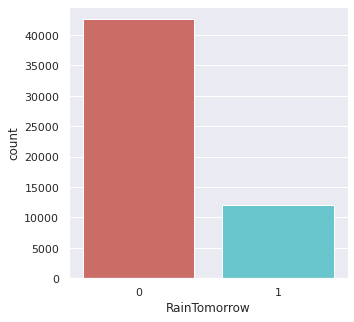

In [ ]:
# Гистограмма для целевой переменной
# Баланс классов
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(train['RainTomorrow'])
sns.countplot(x='RainTomorrow', data=y_data, palette='hls')
plt.show()

## Feature preprosessing

### Коррелирующие признаки

In [3]:
# ['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']
# удалим их из набора
train = train.drop(columns=['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm'])

### Обработка пустых значений

In [4]:
# Обработка пропущенных значений
print(f'Train shape befor null preprosessing: {train.shape}')
train = train.drop(columns=['Evaporation', 'Sunshine'])
print(f'Train shape after null preprosessing: {train.shape}')

Train shape befor null preprosessing: (135414, 17)
Train shape after null preprosessing: (135414, 15)


In [5]:
train = train.drop(columns=['Location'])

In [6]:
# Обработка пропущенных значений
# для категориального признака:
# Location, WindGustDir, WindDir9am, WindDir3pm

train['WindGustDir'].fillna(train['WindGustDir'].mode()[0], inplace=True)
train['WindDir9am'].fillna(train['WindDir9am'].mode()[0], inplace=True)
train['WindDir3pm'].fillna(train['WindDir3pm'].mode()[0], inplace=True)

In [7]:
# Обработка пропущенных значений
null_features = train.isna().sum()[train.isna().sum() > 0]
null_features = null_features.index

# Обработка пропущенных значений
# для числовых признаков

for i in null_features:
    train[i].fillna(train[i].mean(), inplace=True)

In [8]:
train.isna().sum()

MinTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
RainToday        0
RainTomorrow     0
dtype: int64

### Обработка категориальных признаков

In [ ]:
# Обработка категориальных признаков

print(len(train['WindGustDir'].unique()))
print(len(train['WindDir9am'].unique()))
print(len(train['WindDir3pm'].unique()))

16
16
16


In [9]:
# Обработка категориальных признаков

train = pd.get_dummies(train, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

train.loc[:, train.dtypes == object].columns

Index([], dtype='object')

In [10]:
train.head()

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,RainToday,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.7,0.0,24.0,7.0,9.0,65.0,53.0,1028.4,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,15.4,61.2,43.0,19.0,24.0,91.0,65.0,1018.8,8.000000,1,...,0,0,0,0,0,1,0,0,0,0
2,16.8,1.0,35.0,7.0,26.0,80.0,38.0,1020.4,1.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,13.9,0.2,37.0,17.0,20.0,56.0,63.0,1027.7,3.000000,0,...,0,0,0,0,1,0,0,0,0,0
4,7.4,1.8,37.0,0.0,17.0,100.0,58.0,1026.0,4.410111,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
train_features = train.drop(columns=['RainTomorrow']).columns
train_features

Index(['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'RainToday',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'Wi

### Масштабирование признаков

In [ ]:
# Выделим из набора данных вектор признаков и вектор ответов
X = train.drop(columns=['RainTomorrow'])
y = train['RainTomorrow']

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)
# std.fit(X)
# X_std = std.transform(X)

# # mmsc = MinMaxScaler()
# # X_norm = mmsc.fit_transform(X)

### Обработка тестового датасета

In [12]:
# Тестовые данные необходимо обработать также как и тренировочные
# Обработка пропущенных значений
# В отличии от тренировочных данных тут нельзя использовать dropna() - вот такая вот боль((

test = test.drop(columns=['Evaporation', 'Sunshine', 'Location'])

# Обработка пропущенных значений
# для категориального признака:
# WindGustDir, WindDir9am, WindDir3pm

test['WindGustDir'].fillna(test['WindGustDir'].mode()[0], inplace=True)
test['WindDir9am'].fillna(test['WindDir9am'].mode()[0], inplace=True)
test['WindDir3pm'].fillna(test['WindDir3pm'].mode()[0], inplace=True)

null_features = test.isna().sum()[test.isna().sum() > 0]
null_features = null_features.index

# Обработка пропущенных значений
# для числовых признаков

for i in null_features:
    test[i].fillna(test[i].mean(), inplace=True)

test.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [13]:
# ['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']
# удалим их из набора
test = test.drop(columns=['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm'])

In [14]:
# Обработка категориальных признаков

test = pd.get_dummies(test, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

test.loc[:, test.dtypes == object].columns

Index([], dtype='object')

In [15]:
test_features = test.columns
test_features

Index(['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'RainToday',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'Wi

In [27]:
test_std = std.transform(test)

### Признаковое пространство

In [ ]:
print(f'Number of train features: {len(train_features)}')
print(f'Number of test features: {len(test_features)}')

Number of train features: 58
Number of test features: 58


In [ ]:
len(set(train_features) & set(test_features))

58

## Балансировка данных

In [17]:
# Выделим из набора данных вектор признаков и вектор ответов
X = train.drop(columns=['RainTomorrow'])
y = train['RainTomorrow']

In [18]:
print("До балансировки данных")
print(X.shape)
print(y.value_counts())

До балансировки данных
(135414, 58)
0    105588
1     29826
Name: RainTomorrow, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=13)

column = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['RainTomorrow'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

После балансировки
(211176, 58)
RainTomorrow
0               105588
1               105588
dtype: int64


## Model bulding

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (147823, 58), (147823, 1)
Train dataset size: (63353, 58), (63353, 1)


In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8991523684750525
0.8959022403258655
CPU times: user 52.3 s, sys: 768 ms, total: 53.1 s
Wall time: 1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


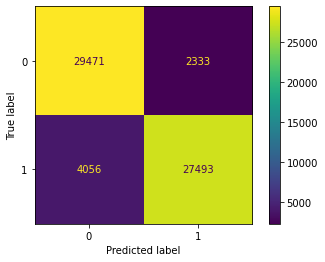

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [24]:
%%time
# Отбор признаков
from sklearn.feature_selection import RFE
import numpy as np

rfe = RFE(clf, n_features_to_select=30)
rfe.fit(X, y)

CPU times: user 13min 44s, sys: 9.38 s, total: 13min 54s
Wall time: 13min 54s


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=30)

In [25]:
print(rfe.ranking_)
# Support указывает на то был выбран признак или нет
print(rfe.support_)

pd.DataFrame(rfe.support_, index=X.columns, columns=["Rank"]).head()

[ 1  1  1  1  1  1  1  1  1  1 27 26 28  1 14 21 13  4  1 11 16  2  1  1
  1  1 24 19 29  1  6  1  1  1  9 23 25 10  5  1  3  8 17 20 22  1  1  1
  1  1  1  1 12 18 15  1  1  7]
[ True  True  True  True  True  True  True  True  True  True False False
 False  True False False False False  True False False False  True  True
  True  True False False False  True False  True  True  True False False
 False False False  True False False False False False  True  True  True
  True  True  True  True False False False  True  True False]


,Rank
MinTemp,True
Rainfall,True
WindGustSpeed,True
WindSpeed9am,True
WindSpeed3pm,True


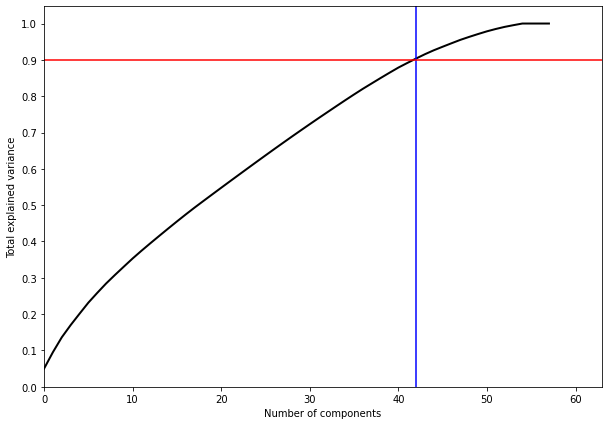

CPU times: user 1.69 s, sys: 536 ms, total: 2.22 s
Wall time: 1.84 s


In [30]:
%%time
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X_std)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(42, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [31]:
%%time

pca = PCA(n_components=42)

principalComponents = pca.fit_transform(X_std)

principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()

CPU times: user 3.68 s, sys: 1.03 s, total: 4.71 s
Wall time: 2.67 s


0.8912658768613896

In [32]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-2.364485,0.592195,2.005823,-0.904162,-0.726129,-0.930114,0.502643,-0.087933,0.227892,0.778136,...,-0.439528,0.832199,0.610599,-1.482624,-0.841385,-2.249364,0.659762,0.173013,1.477298,1.990936
1,3.889559,3.452647,2.430625,1.070004,-0.152697,1.904481,0.939831,1.077979,0.126152,-0.311682,...,2.025680,-0.432285,2.891783,1.819224,0.248288,-0.657910,1.088425,-0.661474,-0.839467,0.820510
2,-1.278626,-0.808381,-1.064850,1.420905,0.285919,1.611992,1.021355,-2.588080,-2.005428,0.524620,...,1.287742,1.144788,0.076839,-0.863923,0.028714,1.175378,1.239978,-0.982727,0.907703,0.502811
3,-1.057854,-0.565545,2.486746,0.265821,-1.017591,-2.253598,-1.153827,-0.849382,-0.862987,1.769933,...,-0.541917,0.560661,0.684931,0.552890,1.954459,1.136470,-0.017572,0.430062,0.238714,0.087167
4,-0.261239,3.139345,-0.169840,-1.285566,-0.588908,1.073828,0.164785,1.202232,-1.041703,-1.232308,...,0.482814,-0.472152,0.358002,0.988615,1.176673,1.223784,-0.074706,-1.143710,0.748049,-1.157548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135409,-0.182771,-1.176362,1.971362,0.952276,0.170202,-1.279301,-0.183853,0.070060,0.300537,0.732200,...,-1.129142,-1.592287,-0.430258,-0.516084,-0.654484,-0.435883,1.409428,0.280938,0.645922,1.181424
135410,0.856607,-0.671406,0.915149,-2.197730,-0.279623,1.300369,-0.447914,0.198738,-0.656029,0.933183,...,-0.787243,-0.987149,-1.547911,-2.147744,-0.874923,1.219000,-0.445609,0.066781,1.470256,-1.255180
135411,0.172602,1.418365,1.663819,1.712971,1.080657,-0.535773,0.824885,1.333323,2.094845,0.697022,...,0.906632,-0.216528,-0.520411,-1.481188,-0.375342,-0.651740,0.567335,1.282442,-0.263045,1.746687
135412,2.544370,0.573007,-0.132798,-1.887479,1.863198,1.809373,-1.665004,0.787894,-0.354744,2.992686,...,0.234010,-0.032022,0.570356,-0.017337,0.398546,-0.048682,-0.156755,0.133001,-0.028677,0.268754


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (94789, 42), (94789,)
Train dataset size: (40625, 42), (40625,)


In [34]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

clf_pca = RandomForestClassifier(random_state=42)

clf_pca.fit(X_train, y_train)
y_pred = clf_pca.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8187323076923076
0.4880422691879867
CPU times: user 2min 5s, sys: 199 ms, total: 2min 6s
Wall time: 2min 20s


## Test prediction

In [40]:
len(test_std)

10046

In [35]:
principalComponents_test = pca.transform(test_std)

principalDf_test= pd.DataFrame(data = principalComponents_test)

In [41]:
y_pred_test = clf_pca.predict(principalDf_test)

In [42]:
ans = pd.Series(y_pred_test)

ans.to_csv('prediction.csv', header=None, index=False)

In [43]:
ans

0        0
1        0
2        1
3        0
4        0
        ..
10041    0
10042    0
10043    0
10044    0
10045    0
Length: 10046, dtype: int64